# Random Forrests for Exploration of DEAP Dataset
Fingerprinting with DMD modes has worked really well. Can we learn from RF's too? Which features are important?

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

/home/tris/anaconda3/envs/fastai_old/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
PATH = "/home/tris/Documents/EEG_data/DMD_DEAP"

In [16]:
col_names=['subject','trial','mode_no','real1','real2','real3','real4','real5','real6','real7','real8','real9','real10','real11','real12','real13','real14','real15','real16','real17','real18','real19','real20','real21','real22','real23','real24','real25','real26','real27','real28','real29','real30','real31','real32','imag1','imag2','imag3','imag4','imag5','imag6','imag7','imag8','imag9','imag10','imag11','imag12','imag13','imag14','imag15','imag16','imag17','imag18','imag19','imag20','imag21','imag22','imag23','imag24','imag25','imag26','imag27','imag28','imag29','imag30','imag31','imag32','fn','zeta'];

In [17]:
len(col_names)

69

In [19]:
df_raw = pd.read_csv('/home/tris/Documents/EEG_data/DMD_DEAP/dmd_deap_100modes_vecs.csv',header=None, names=col_names)
df_raw

,subject,trial,mode_no,real1,real2,real3,real4,real5,real6,real7,...,imag25,imag26,imag27,imag28,imag29,imag30,imag31,imag32,fn,zeta
0,1,1,1,-0.233814,0.653657,1.119798,1.118466,-1.255351,-1.236550,1.164892,...,0.358402,0.231342,-0.282112,-0.102463,1.269087,-0.602535,0.980090,0.583008,39.773965,0.037864
1,1,1,2,-0.969863,-0.720410,-0.466967,-0.403137,-0.033661,-0.303601,0.516251,...,0.292212,0.683578,0.712324,0.220430,-0.325849,1.042614,-0.439303,-0.508781,39.247203,0.039895
2,1,1,3,1.700171,1.721272,1.682740,1.707089,1.173998,0.844426,0.774884,...,0.733444,1.213559,1.093763,0.406481,1.063819,1.420983,0.799485,0.448324,37.805621,0.051107
3,1,1,4,0.720502,1.007657,1.283749,0.814081,-0.209438,0.377033,0.619588,...,0.091587,-0.222744,0.090740,0.001649,0.065053,0.141014,-0.120066,-0.383417,36.233767,0.056515
4,1,1,5,0.177535,0.185284,0.119175,-0.289875,-0.300527,0.045760,-0.443727,...,0.132251,1.767138,0.348059,-0.511474,-0.909534,0.003420,-1.370316,-1.478614,33.840774,0.078882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63995,32,40,46,1.332834,0.458221,1.152535,-1.927631,-0.077903,1.881693,0.931110,...,-0.728442,0.466957,-4.243140,-1.094212,-0.893601,-2.149343,-2.515235,-1.037549,8.010576,0.147832
63996,32,40,47,-2.554262,-2.770043,-0.071107,-1.917483,1.219112,0.777120,1.624867,...,2.058085,-1.567285,2.461179,1.790917,1.097920,-1.484108,2.898821,-0.070275,7.610978,0.154817
63997,32,40,48,1.769437,7.856667,3.457387,12.130922,0.863311,-0.122387,-2.668721,...,-1.628713,0.317715,-0.247429,-0.554011,-1.184486,-0.994303,-0.054431,-0.227949,7.332086,0.166979
63998,32,40,49,2.033926,5.380182,3.489802,7.566818,2.008225,1.209121,-0.942851,...,-0.984694,0.066438,-1.360488,-0.618895,-1.474774,-1.446316,-0.970886,-1.971653,8.987644,0.184399


In [20]:
df_raw.iloc[[40],:]

,subject,trial,mode_no,real1,real2,real3,real4,real5,real6,real7,...,imag25,imag26,imag27,imag28,imag29,imag30,imag31,imag32,fn,zeta
40,1,1,41,-0.528828,-1.250851,-2.298565,-0.089783,-1.076812,-1.97694,-0.157367,...,1.22405,-1.133452,0.368515,1.116685,1.359537,-0.162272,1.608768,1.324755,10.243236,0.166065


In [21]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/eeg-raw')

In [23]:
import pandas as pd
df_raw = pd.read_feather('tmp/eeg-raw') #lol raw fish sashimis and sushis
df_raw.head()

,subject,trial,mode_no,real1,real2,real3,real4,real5,real6,real7,...,imag25,imag26,imag27,imag28,imag29,imag30,imag31,imag32,fn,zeta
0,1,1,1,-0.233814,0.653657,1.119798,1.118466,-1.255351,-1.236550,1.164892,...,0.358402,0.231342,-0.282112,-0.102463,1.269087,-0.602535,0.980090,0.583008,39.773965,0.037864
1,1,1,2,-0.969863,-0.720410,-0.466967,-0.403137,-0.033661,-0.303601,0.516251,...,0.292212,0.683578,0.712324,0.220430,-0.325849,1.042614,-0.439303,-0.508781,39.247203,0.039895
2,1,1,3,1.700171,1.721272,1.682740,1.707089,1.173998,0.844426,0.774884,...,0.733444,1.213559,1.093763,0.406481,1.063819,1.420983,0.799485,0.448324,37.805621,0.051107
3,1,1,4,0.720502,1.007657,1.283749,0.814081,-0.209438,0.377033,0.619588,...,0.091587,-0.222744,0.090740,0.001649,0.065053,0.141014,-0.120066,-0.383417,36.233767,0.056515
4,1,1,5,0.177535,0.185284,0.119175,-0.289875,-0.300527,0.045760,-0.443727,...,0.132251,1.767138,0.348059,-0.511474,-0.909534,0.003420,-1.370316,-1.478614,33.840774,0.078882


In [24]:
df_raw.iloc[[40],:]

,subject,trial,mode_no,real1,real2,real3,real4,real5,real6,real7,...,imag25,imag26,imag27,imag28,imag29,imag30,imag31,imag32,fn,zeta
40,1,1,41,-0.528828,-1.250851,-2.298565,-0.089783,-1.076812,-1.97694,-0.157367,...,1.22405,-1.133452,0.368515,1.116685,1.359537,-0.162272,1.608768,1.324755,10.243236,0.166065


Text(0.5, 1.0, 'Real Chan. 5')

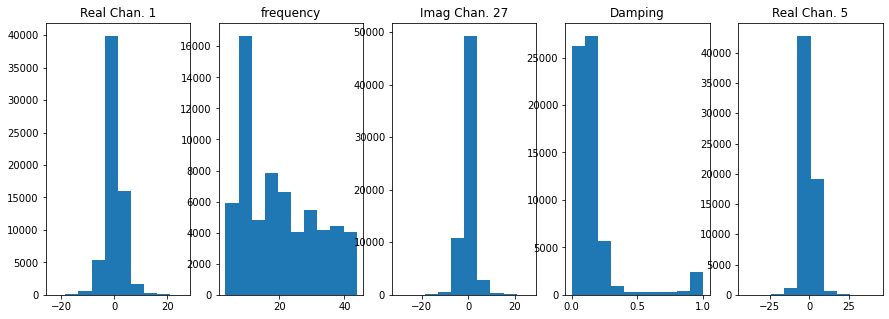

In [26]:
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
axs[0].hist(df_raw.real1)
axs[0].set_title('Real Chan. 1')
axs[1].hist(df_raw.fn)
axs[1].set_title('frequency')
axs[2].hist(df_raw.imag27)
axs[2].set_title('Imag Chan. 27')
axs[3].hist(df_raw.zeta)
axs[3].set_title('Damping')
axs[4].hist(df_raw.real5)
axs[4].set_title('Real Chan. 5')

In [27]:
train_cats(df_raw)
df, y, nas = proc_df(df_raw, 'subject')

In [28]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y) #overfit, but proves code is working

0.9576876464809384

In [32]:
msk = np.random.rand(len(df)) < 0.8
X_train = df[msk]
y_train=y[msk]
X_valid = df[~msk]
y_valid = y[~msk]
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((51249, 68), (51249,), (12751, 68), (12751,))

In [33]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [34]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 22min 38s, sys: 1.08 s, total: 22min 39s
Wall time: 3min 7s
[1.9440532570395723, 5.094469945881307, 0.9558088783463597, 0.6915786893840828]


In [37]:
?? print_score

In [38]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([ 5., 11.,  9., 16., 17.,  1., 30., 16.,  1.,  1.,  1.,  1., 26.,  6.,  1., 31., 16., 27.,  5.,  5.,
         6.,  1.,  1.,  1., 10., 21., 30., 10.,  1.,  8., 16., 30.,  1.,  1.,  7.,  2.,  1., 23., 24.,  9.,
         1., 16., 17., 21., 11.,  2., 29., 31.,  1.,  8., 26., 10.,  1.,  1., 30., 26.,  5., 19.,  1.,  1.,
        11., 17., 32., 21.,  3.,  1., 27.,  1.,  1., 19., 16., 13.,  8., 20., 20., 18.,  1.,  8., 23.,  1.,
        19.,  1.,  1.,  1.,  5., 13.,  5., 11., 10., 24.,  8.,  1., 16., 16., 24.,  5.,  1., 14.,  1., 32.]),
 11.55,
 1)

In [39]:
preds.shape

(100, 12751)

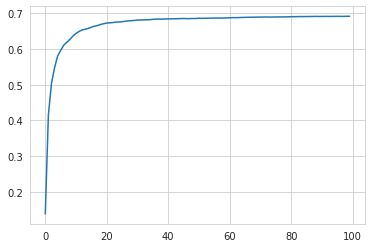

In [43]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(100)]);
plt.grid(True)

In [44]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[2.169941894907483, 5.28512427710282, 0.944942698952143, 0.6680621495639416]


In [45]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[2.0327857389180233, 5.147276768421807, 0.95168278217481, 0.6851516577624932]


In [46]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[1.9506033447948992, 5.093549653599196, 0.9555105908847747, 0.6916901090677119]


In [47]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[2.024916461567092, 5.155134668266666, 0.9520561472842987, 0.6841896208225635, 0.6558062582597399]


In [48]:
def dectree_max_depth(tree):
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)

In [49]:
t=m.estimators_[0].tree_

In [50]:
dectree_max_depth(t)

65

In [51]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[2.421927322926877, 5.154274088440533, 0.9314131398017034, 0.6842950525420801, 0.6555846058089945]


In [52]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[2.5133397376744453, 5.239704495583008, 0.9261379930201067, 0.6737429096626046, 0.6451309550319786]


In [53]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[1.9657748281005265, 5.0954631301025515, 0.9548158363766056, 0.691458422097619]


In [61]:


m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)



[2.505049786384013, 5.2257311266728, 0.9266244394890384, 0.675480729717467, 0.6476294454322943]


In [62]:
%time preds = np.stack([t.predict(X_valid) for t in m.estimators_])
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 296 ms, sys: 2 µs, total: 296 ms
Wall time: 295 ms


(11.52186507936508, 8.632435940185184)

In [63]:
fi = rf_feat_importance(m, X_train); fi[:10]

,cols,imp
24,real23,0.033266
42,imag9,0.032346
21,real20,0.028109
17,real16,0.027822
56,imag23,0.026324
53,imag20,0.024680
10,real9,0.022816
49,imag16,0.022801
8,real7,0.020889
12,real11,0.019997


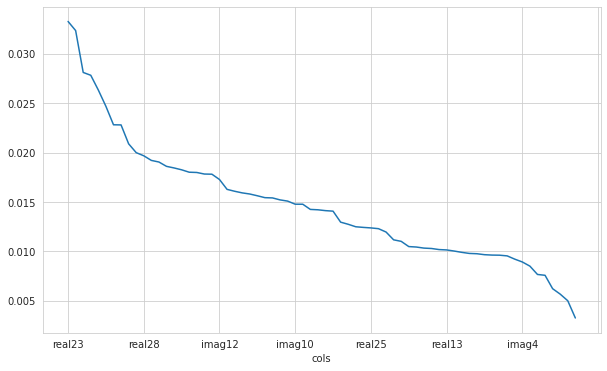

In [64]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

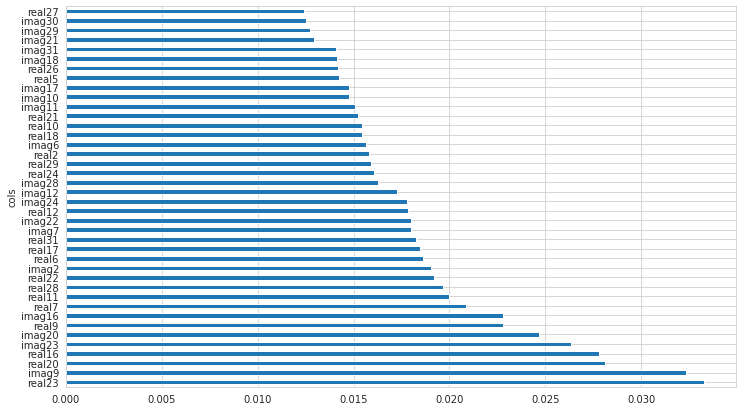

In [65]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)
plot_fi(fi[:40]);

In [68]:
to_keep = fi[fi.imp>0.005].cols; len(to_keep)

67

In [66]:
from scipy.cluster import hierarchy as hc

In [84]:
len(df.columns)

68

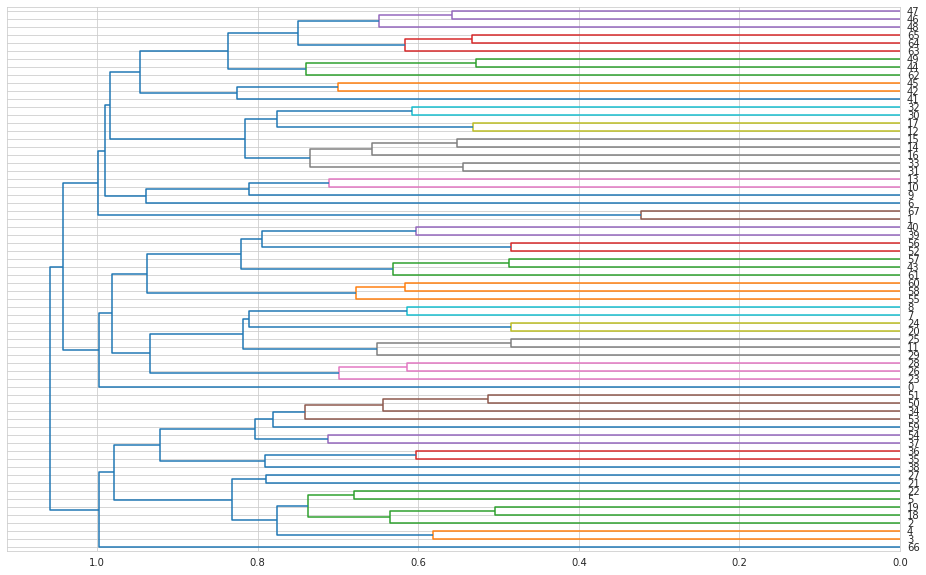

In [89]:
corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z,orientation='left', leaf_font_size=10)
plt.show()